In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm


In [2]:
df=pd.read_csv('NS2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I am going to work on the dataset in 4 parts:
 
 1.) Impact of Gender and Age with Showing up at the appointment
 
 2.) Impact of government incentives and assistance with showing up at the appointment.
 
 3.) Schedule day, Appointment day relation with showing up at the appointment.
 
 4.) Impact of diseases or health problems with showing up at the appointment.

**PART-1**

**Questions**

After looking into the dataset, I am going to find asnwers for the following questions

1.)How Many percent of appointmentId were successful, i.e patient showed up?

2.)What  is the relation of gender and age with showing up on appointments?
 

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not  show up.


**DATA CLEANING**

-> I will drop unwanted columns

->No-show column is quite ambiguous up, so I will change the name to show up and the values to 1, if patient showed up and 0 if he didn't showed up.

-> Changing data types of ScheduleDay and AppointmentDay

In [4]:
df1=df.copy()
df1=df1.drop(['PatientId','ScheduledDay','AppointmentDay','Hipertension','Diabetes','Alcoholism','Handcap'],axis=1)
df1=df1.rename({'No-show':'Show-Up'},axis=1)
df1['Show-Up']=df1['Show-Up'].replace('No',1)
df1['Show-Up']=df1['Show-Up'].replace('Yes',0)
df1.head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,SMS_received,Show-Up
0,5642903,F,62,JARDIM DA PENHA,0,0,1
1,5642503,M,56,JARDIM DA PENHA,0,0,1
2,5642549,F,62,MATA DA PRAIA,0,0,1
3,5642828,F,8,PONTAL DE CAMBURI,0,0,1
4,5642494,F,56,JARDIM DA PENHA,0,0,1


In [5]:

df1.head(10)

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,SMS_received,Show-Up
0,5642903,F,62,JARDIM DA PENHA,0,0,1
1,5642503,M,56,JARDIM DA PENHA,0,0,1
2,5642549,F,62,MATA DA PRAIA,0,0,1
3,5642828,F,8,PONTAL DE CAMBURI,0,0,1
4,5642494,F,56,JARDIM DA PENHA,0,0,1
5,5626772,F,76,REPÚBLICA,0,0,1
6,5630279,F,23,GOIABEIRAS,0,0,0
7,5630575,F,39,GOIABEIRAS,0,0,0
8,5638447,F,21,ANDORINHAS,0,0,1
9,5629123,F,19,CONQUISTA,0,0,1


In [6]:
df1.count()

AppointmentID    110527
Gender           110527
Age              110527
Neighbourhood    110527
Scholarship      110527
SMS_received     110527
Show-Up          110527
dtype: int64

In [7]:
df1['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [8]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [9]:
a=df1['Neighbourhood'].tolist()
np.unique(a)

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
       'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
       'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO',
       'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO',
       'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI',
       'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
       'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH',
       'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE',
       'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',



**Define**

How Many percent of appointmentId were successful, i.e patient showed up?

**Code**


In [10]:
df1['Show-Up'].value_counts()

1    88208
0    22319
Name: Show-Up, dtype: int64

In [11]:
round(((df1['Show-Up'].value_counts()/df1['Show-Up'].count())*100),2)

1    79.81
0    20.19
Name: Show-Up, dtype: float64

In [12]:
df1['Show-Up'].unique(
)

array([1, 0], dtype=int64)

Nearly 80% of patients showed up on their appointments and 20% didn't

**Test and Visualizee**

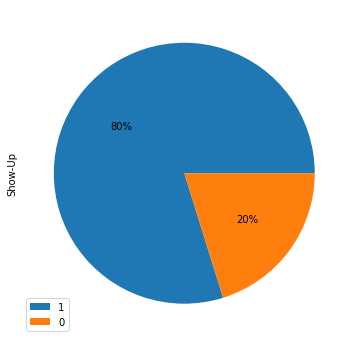

In [13]:
df1['Show-Up'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6),labels=None)
plt.legend(labels=df1['Show-Up'].unique(), loc='lower left') 
plt.show()

**Define**

What  is the relation of gender and age with showing up on appointments?

**Code**

Gender

In [14]:
df1['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [15]:
round(((df1['Gender'].value_counts()/df1['Gender'].count())*100),2)

F    65.0
M    35.0
Name: Gender, dtype: float64

In [16]:
b=df1.groupby(['Gender','Show-Up']).size()
b

Gender  Show-Up
F       0          14594
        1          57246
M       0           7725
        1          30962
dtype: int64

In [17]:
round(((b/df1['Gender'].count())*100),2)

Gender  Show-Up
F       0          13.20
        1          51.79
M       0           6.99
        1          28.01
dtype: float64

**Test and Visualize**

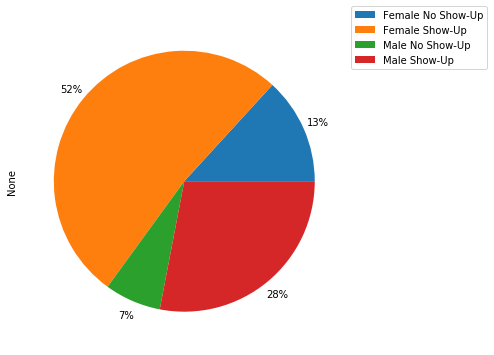

In [18]:
df1.groupby(['Gender','Show-Up']).size().plot(kind='pie',labels=None,autopct='%1.0f%%',figsize=(18,6),pctdistance=1.12)
plt.legend(labels=['Female No Show-Up','Female Show-Up','Male No Show-Up','Male Show-Up'],loc='lower right',bbox_to_anchor=(0.75,0.75),
          bbox_transform=plt.gcf().transFigure)
plt.show()

bbox_to_anchor is a keyword to move legend


Text(0.5, 1.0, 'Gender variation in showing up at appointment')

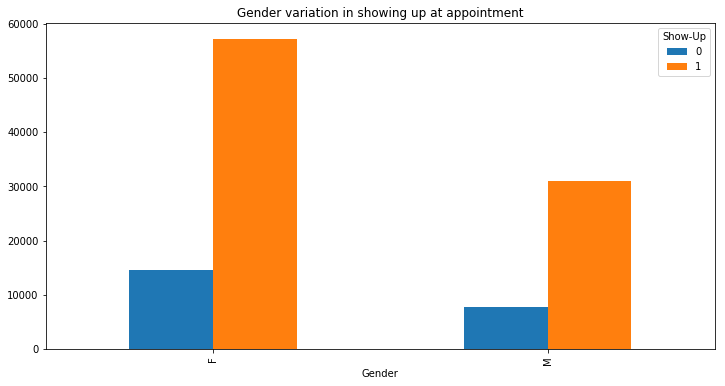

In [19]:
df1.groupby(['Gender','Show-Up'])['Show-Up'].count().unstack('Show-Up').plot(kind='bar',stacked=False,figsize=(12,6))
plt.title('Gender variation in showing up at appointment')


There are 65% total female patients.  52% female patients of all patients showed up on their appointments.

There are 35% total male patients. 28% male patients of all patients showed up on their appointments.



Age

In [20]:
age_g=[0,5,10,20,30,40,50,60,70,80,90]
age=['0','5','10','20','30','40','50','60','70','80']
df1['age_group']=pd.cut(df['Age'],age_g,labels=age)
df1.head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,SMS_received,Show-Up,age_group
0,5642903,F,62,JARDIM DA PENHA,0,0,1,60
1,5642503,M,56,JARDIM DA PENHA,0,0,1,50
2,5642549,F,62,MATA DA PRAIA,0,0,1,60
3,5642828,F,8,PONTAL DE CAMBURI,0,0,1,5
4,5642494,F,56,JARDIM DA PENHA,0,0,1,50


O means below 5 years of age, which means an infant child

In [21]:
c=df1.groupby(['Show-Up','age_group']).size()
c

Show-Up  age_group
0        0             1546
         5             1603
         10            3308
         20            3394
         30            3232
         40            2870
         50            2721
         60            1648
         70             889
         80             407
1        0             6646
         5             5415
         10            9791
         20           10389
         30           11820
         40           11550
         50           12940
         60            9541
         70            4832
         80            2137
dtype: int64

**Test and Visualize**

Text(0.5, 1.0, 'Age distribution of Patients')

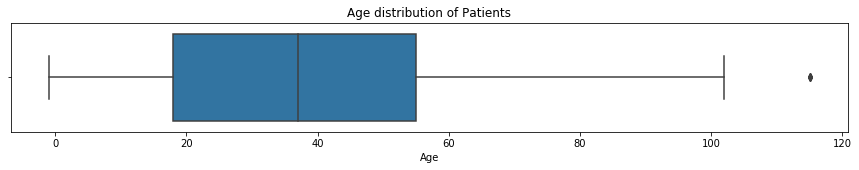

In [22]:
plt.figure(figsize=(15,2))
sb.boxplot(x=df1.Age)
plt.title('Age distribution of Patients')

Text(0.5, 1.0, 'Appointments made by different age groups')

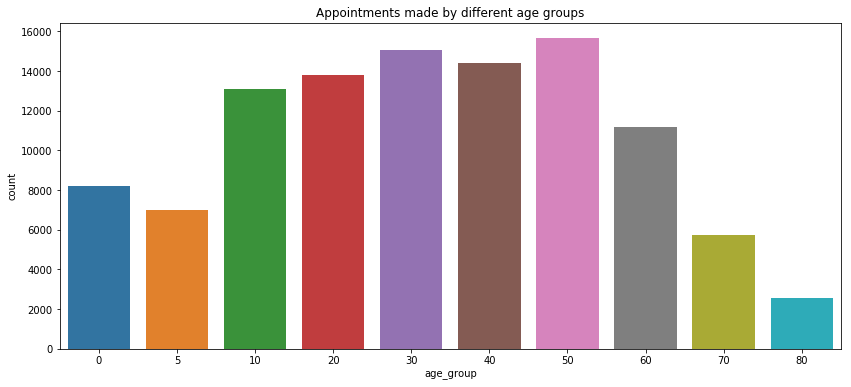

In [23]:
plt.figure(figsize=(14,6))
sb.countplot(x=df1.age_group)
plt.title("Appointments made by different age groups")

Text(0.5, 1.0, 'No of patients by age ')

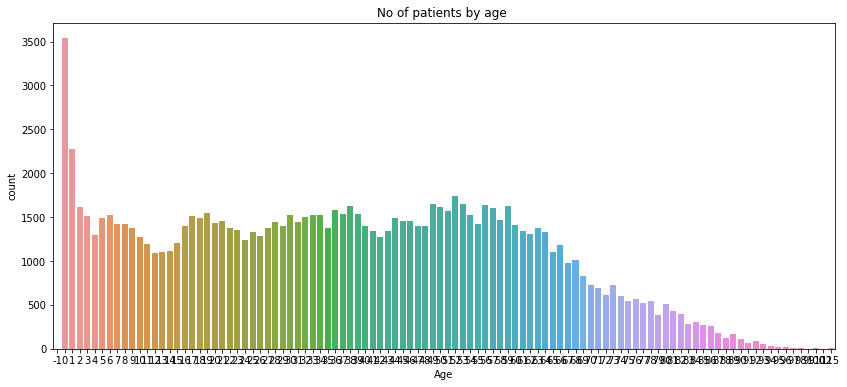

In [24]:
plt.figure(figsize=(14,6))
sb.countplot(x=df1.Age)
plt.title("No of patients by age ")

people in age group of 50-60 years makes the most numbered of appointments, followed by people in age group of 30-40 years. 

By age analysis, infants have the highest number of appointments

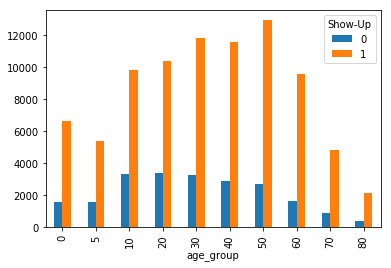

In [25]:
df1.groupby(['age_group', 'Show-Up'])['age_group'].count().unstack('Show-Up').plot( kind='bar', stacked=False)


Max number of missing the appointments was in the age group of 10-20,20-30,30-40 years

**PART-2**

**Define**

Does scholarship increases the chance of showing up on appointments? 

**Code**


In [26]:
df1['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [27]:
df1.groupby(['Scholarship','Show-Up']).size()

Scholarship  Show-Up
0            0          19741
             1          79925
1            0           2578
             1           8283
dtype: int64

In [28]:
round(((df1.groupby(['Scholarship','Show-Up']).size()/df1['Gender'].count())*100),2)

Scholarship  Show-Up
0            0          17.86
             1          72.31
1            0           2.33
             1           7.49
dtype: float64

**Test and Visualize**


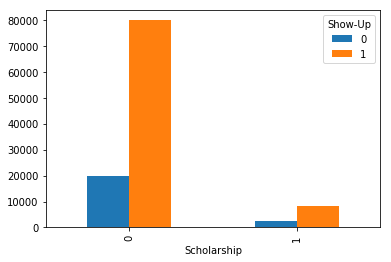

In [29]:
df1.groupby(['Scholarship','Show-Up'])['Show-Up'].count().unstack('Show-Up').plot(kind='bar',stacked=False)

Around 10k people got scholarship and from it around 2.5K people didnt showed up. Which is also in line with the fact that around 20% people don't show up for the appointment.

**Define**

Does SMS sent on patients increase their chance to show up at appointments?

**Code**


In [30]:
df1['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [31]:
df1.groupby(['SMS_received','Show-Up']).size()

SMS_received  Show-Up
0             0          12535
              1          62510
1             0           9784
              1          25698
dtype: int64

In [32]:
round(((df1.groupby(['SMS_received','Show-Up']).size()/df1['Gender'].count())*100),2)

SMS_received  Show-Up
0             0          11.34
              1          56.56
1             0           8.85
              1          23.25
dtype: float64

**Test and Visualize**

Text(0.5, 1.0, 'Impact of SMS sent on show ups at appointment')

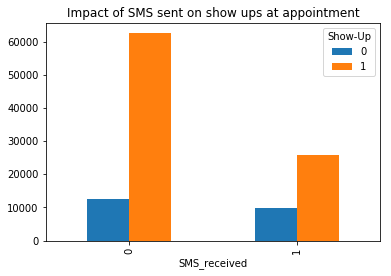

In [33]:
df1.groupby(['SMS_received','Show-Up'])['Show-Up'].count().unstack('Show-Up').plot(kind='bar',stacked=False)
plt.title("Impact of SMS sent on show ups at appointment")

Around 35K received SMS, among them around 25K showed up for appointments, which is near to 70% of people getting appointments. People not showing up for the appointment still remains at 25-30%.

**PART 3**

**Define**

How is Schedule date, Appointment date and show ups related?

**Code**

In [34]:
df2=df.copy()
df2=df2.drop(['PatientId'],axis=1)
df2=df2.rename({'No-show':'Show-Up'},axis=1)
df2['Show-Up']=df2['Show-Up'].replace('No',1)
df2['Show-Up']=df2['Show-Up'].replace('Yes',0)
df2.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show-Up
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [35]:
df2['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df2['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Show-Up           110527 non-null int64
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [37]:
df2['awaiting_time_days'] = (df2.AppointmentDay - df2.ScheduledDay).dt.days
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
AppointmentID         110527 non-null int64
Gender                110527 non-null object
ScheduledDay          110527 non-null datetime64[ns]
AppointmentDay        110527 non-null datetime64[ns]
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
Show-Up               110527 non-null int64
awaiting_time_days    110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 11.8+ MB


In [38]:
df2['AppointmentDay']=df2.ScheduledDay.dt.weekday_name
df2['AppointmentDay'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: AppointmentDay, dtype: int64

In [39]:
df2.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show-Up,awaiting_time_days
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067,10.183702
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


In [40]:
df2.groupby(['AppointmentDay','Show-Up']).size()

AppointmentDay  Show-Up
Friday          0           3887
                1          15028
Monday          0           4561
                1          18524
Saturday        0              1
                1             23
Thursday        0           3700
                1          14373
Tuesday         0           5291
                1          20877
Wednesday       0           4879
                1          19383
dtype: int64

**Test and Visualize**

Text(0.5, 1.0, 'Relation of weekdays with appointment show ups')

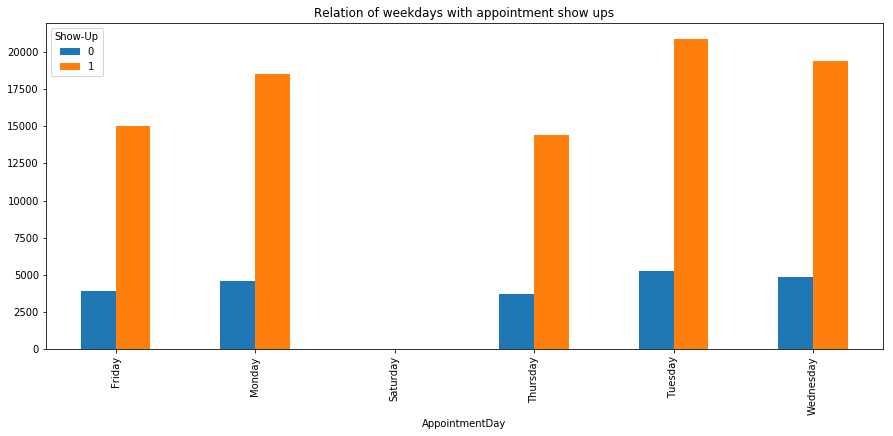

In [41]:
df2.groupby(['AppointmentDay','Show-Up'])['Show-Up'].count().unstack('Show-Up').plot(kind='bar',stacked=False,figsize=(15,6))
plt.title('Relation of weekdays with appointment show ups')

There is no specific/unique relation between weekdays and appointment show ups. Though On Tuesdays there are highest number of appointments and on Saturday the least, to be precise only 24 appointments from 110K appointments. 

In [42]:
df2['awaiting_time_days'].value_counts()

 0      38563
 2       6725
 4       5290
 1       5213
 7       4906
 6       4037
 5       3277
 14      2913
 3       2737
 8       2332
 21      1861
 28      1706
 13      1682
 9       1605
 15      1503
 10      1391
 20      1187
 22      1173
 16      1151
 12      1115
 17      1107
 29      1089
 19      1044
 18      1021
 27      1013
 11       987
 35       963
 23       822
 34       808
 26       731
        ...  
 98         5
 112        5
 103        5
 109        5
 108        5
 102        4
-1          4
 105        4
 96         4
 119        4
 122        3
 92         3
 115        2
 93         2
 110        2
 107        2
 97         2
 94         2
 123        1
 101        1
 126        1
 125        1
 139        1
 151        1
 132        1
 117        1
 146        1
 82         1
-6          1
 127        1
Name: awaiting_time_days, Length: 131, dtype: int64

In [43]:
c=df2['awaiting_time_days'].unique()
c.sort()

In [44]:
c

array([ -6,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103,
       104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123,
       125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176,
       179], dtype=int64)

There are 5 People who have negative awaiting time, which means there is some error in their entries. 

Around 40k people have Appointment on same date when there was appointment.

Average waiting time between appointment and scheduled DAy is 10days

**PART-4**

**Define**
 
 How is alcoholism, handicap nature, hypertension and Diabetes related with Showing up at the appointments**
 
**Code**

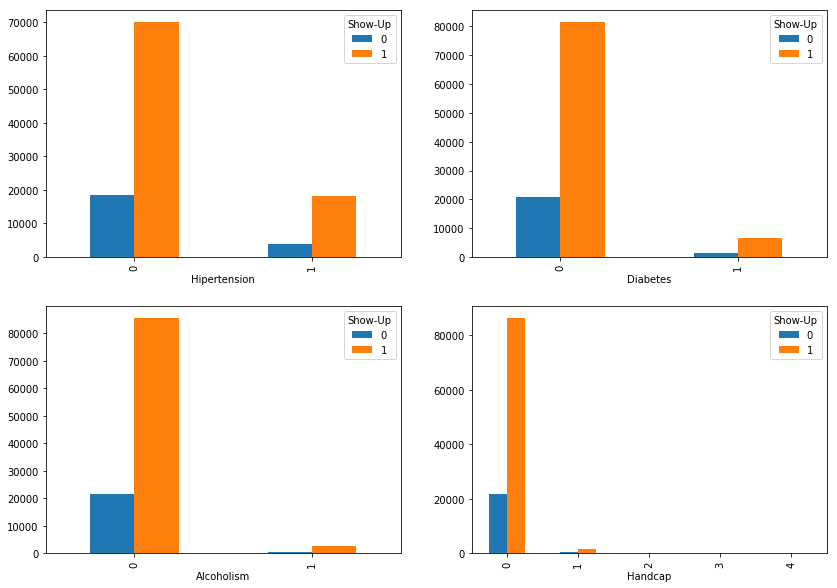

In [50]:
disease = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

fig = plt.figure(figsize=(14, 10))
for i, var in enumerate(disease):
    ax = fig.add_subplot(2, 2, i+1)
    df2.groupby([var, 'Show-Up'])[var].count().unstack('Show-Up').plot(ax=ax, kind='bar', stacked=False)

**Analysis**

-> 80% of patients showed up on their appointments and 20% didn't.

-> Of all the patients who didn't showed up 13% are female and 7% are male.

-> Mean age of patients is 37 years

-> People in age group of 50-60 years makes the most numbered of appointments, followed by people in age group of 30-40 years. 

-> Infants have the highest number of appointments

-> Around 10k people got scholarship and from it around 2.5K people didnt showed up. Which is also in line with the fact that around 20% people don't show up for the appointment.

->There is no specific/unique relation between weekdays and appointment show ups. 

-> On Tuesdays there are highest number of appointments and on Saturday the least, to be precise only 24 appointments from 110K appointments. 

->Around 35K received SMS, among them around 25K showed up for appointments, thus there is no great help of sending SMS to patients.

-> Majority of the population is non-alcoholic and are not handicap

-> Diseases and health issues don't increase chanches of show up.(it is in the range of 75%-85%).